#### FrozenLake 게임 환경 생성

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random

#최대값이 모두 같을 때 random하게 return하도록 작성한 코드.
def rargmax(vector):
    m = np.max(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v3')

#### Q table 초기화

In [2]:
# Q를 모두 0으로 초기화.  Q[16,4]
Q = np.zeros([env.observation_space.n, env.action_space.n])

#### 강화 학습 (Q learning을 통한) 
학습을 하면서 게임을 하므로 게임 초반에는 실패가 많으나 후반으로 갈수록 성공 확률이 높아진다.

In [4]:
# Set learning parameters
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):  # 여러번 반복 학습
    state = env.reset()[0]     # 환경 reset 후, 첫번째 상태 얻음 
    rAll = 0
    done = False
 
    e =  .05 /((i//100)+1)     
    
    # The Q-Table learning algorithm
    while not done:
        # Choose an action by e-greedy 
        # 현재 state의 Q중 최대 reward를 얻을 수 있는 action을 구함. 
        # 단, 알려진 길로만 가지 않기 위해서 random 값이 e보다 적은 경우는 아무렇게나 action 
        # 학습 후반부로 갈 수록 e의 값은 작아져, 정해질 길로 가게 됩니다.  
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = rargmax(Q[state, :])

        # Get new state and reward from environment
        new_state, reward, done, _, info = env.step(action)

        # Update Q-Table with new knowledge using decay rate
        Q[state, action] = reward + np.max(Q[new_state, :])

        rAll += reward
        state = new_state
    rList.append(rAll)



#### 게임 결과 출력
(학습을 하면서 게임을 하므로 게임 초반에는 실패가 많으나 후반으로 갈수록 성공 확률이 높아진다.)

Success rate: 0.877
Final Q-Table Values
LEFT DOWN RIGHT UP
[[1. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]]


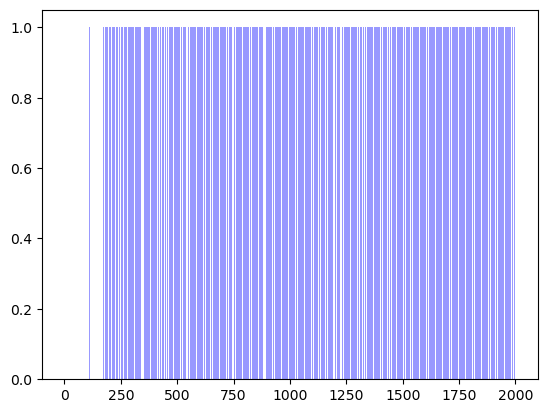

In [5]:

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()
